# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
! curl -o neko.txt http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  943k  100  943k    0     0  2125k      0 --:--:-- --:--:-- --:--:-- 2124k


In [2]:
! mecab neko.txt > neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
with open("neko.txt.mecab", "r") as f:
    texts = f.read()

In [4]:
mecab_results = []
for line in texts.split("\n"):
    if line == "" or line == "EOS":
        continue
    else:
        result = {}
        morpheme = line.split("\t")[0]
        mecab = line.split("\t")[1].split(",")

        result["surface"] = morpheme
        result["base"] = mecab[6]
        result["pos"] = mecab[0]
        result["pos1"] = mecab[1]

        mecab_results.append(result)
        
print(len(mecab_results))

206338


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [5]:
verb_surfaces = [result["surface"]for result in mecab_results  if result["pos"] == "動詞"]

print(len(verb_surfaces))

28906


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [6]:
verb_bases = [result["base"] for result in mecab_results if result["pos"] == "動詞"]

print(len(verb_bases))

28906


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [7]:
sahen_nouns = [result["surface"] for result in mecab_results if result["pos"] == "名詞" and result["pos1"] == "サ変接続"]

print(len(sahen_nouns))

5209


## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
a_no_b = [mecab_results[index]["surface"] + mecab_results[index + 1]["surface"] + mecab_results[index + 2]["surface"] for index in range(0, len(mecab_results[:-2])) if mecab_results[index]["pos"] == mecab_results[index + 2]["pos"] == "名詞" and  mecab_results[index + 1]["surface"] == "の"]

print(len(a_no_b))

6045


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
continuous_noun = []

nouns = []
for result in mecab_results:
    if result["pos"] == "名詞":
        nouns.append(result["surface"])
    else:
        if len(nouns) > 1:
            continuous_noun.append("".join(nouns))
        nouns.clear()

print(len(continuous_noun))

7338


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
from collections import Counter

In [11]:
words = [result["surface"] for result in mecab_results]
counter = Counter(words)

counter.most_common()

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613),
 ('ん', 1568),
 ('か', 1530),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1034),
 ('う', 992),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('なる', 531),
 ('さ', 514),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 478),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 381),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 346),
 ('時', 345),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('三', 319),
 ('——', 319),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('二', 303),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [12]:
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline

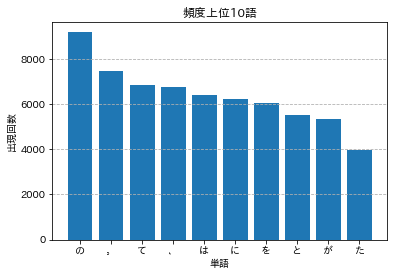

In [13]:
x, y = [], []
for word, count in counter.most_common(10):
    x.append(word)
    y.append(count)

plt.bar(range(len(x)), y, tick_label=x)
plt.title("頻度上位10語")
plt.xlabel("単語")
plt.ylabel("出現回数")
plt.grid(axis="y", linestyle="--")
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


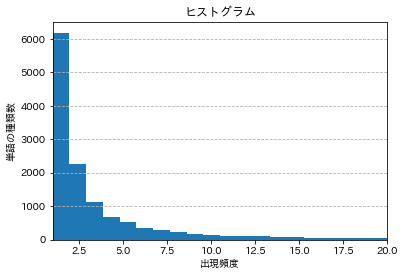

In [14]:
counts = [count for _, count in counter.most_common()]

plt.hist(counts, 20, range=(1, 20))
plt.xlim(xmin=1, xmax=20)
plt.title("ヒストグラム")
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.grid(axis="y", linestyle="--")
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

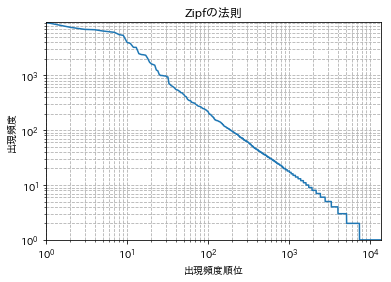

In [15]:
x = list(range(1, len(counts) + 1))

plt.plot(x, counts)
plt.xlim(1, len(counts) + 1)
plt.ylim(1, counts[0])
plt.title("Zipfの法則")
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both", linestyle="--")
plt.show()